In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("TimeSeries.csv")

In [3]:
pd.pandas.set_option('display.max_rows' , None)

In [4]:
df.head(50)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [5]:
df.shape

(18288, 3)

In [6]:
df.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [7]:
df = df.drop('ID',axis=1)

In [8]:
df["Datetime"] = pd.to_datetime(df['Datetime'])

In [9]:
df.head()

,Datetime,Count
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


In [10]:
df.set_index('Datetime', inplace=True)

In [11]:
df.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


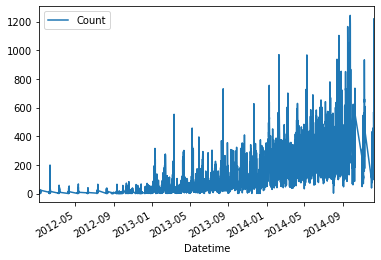

In [12]:
df.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result = adfuller(df['Count'])

In [15]:
test_result

(-4.456560536856817,
 0.00023540466467665943,
 45,
 18242,
 {'1%': -3.430708525404171,
  '5%': -2.861698454786869,
  '10%': -2.5668543412994906},
 181026.8337109476)

In [16]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label + ":" + str(value))
    if result[1] <= 0.05:           #0.05 is the significance value
        print("Data is stationary")
    else:
        print("Data is not stationary")

In [17]:
adfuller_test(df.Count)

ADF Test Statistic:-4.456560536856817
p-value:0.00023540466467665943
#Lags Used:45
Number of Observations Used:18242
Data is stationary


In [18]:
df.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [19]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


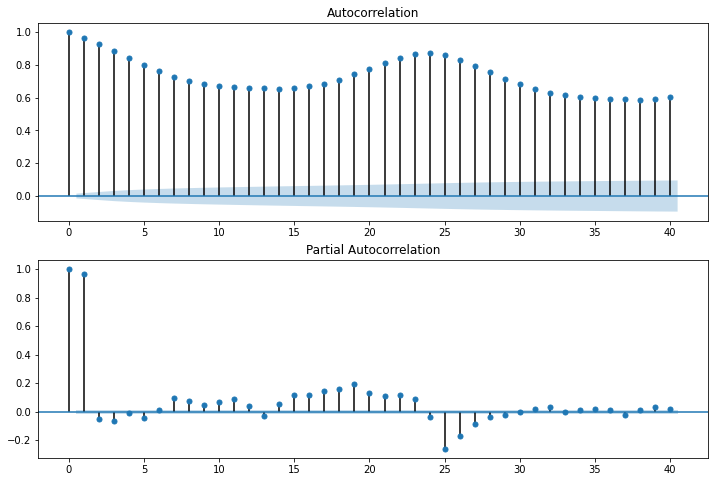

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Count'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Count'], lags=40, ax=ax2)

In [21]:
#p=1
#q=0
#d=0

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.Count, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Count   No. Observations:                18288
Model:                     ARMA(1, 0)   Log Likelihood              -93716.963
Method:                       css-mle   S.D. of innovations             40.670
Date:                Sat, 11 Jul 2020   AIC                         187439.925
Time:                        18:12:41   BIC                         187463.367
Sample:                             0   HQIC                        187447.628
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         139.4497      8.432     16.538      0.000     122.924     155.976
ar.L1.Count     0.9644      0.002    492.382      0.000       0.961       0.968
                                    Roots       

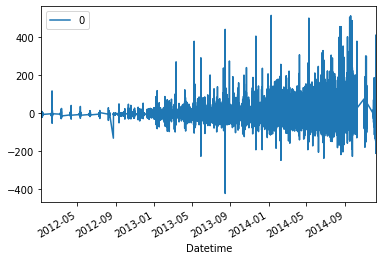

In [25]:
residuals = pd.DataFrame(model_fit.resid)   # residual error n fitted model
residuals.plot()

AxesSubplot(0.125,0.125;0.775x0.755)


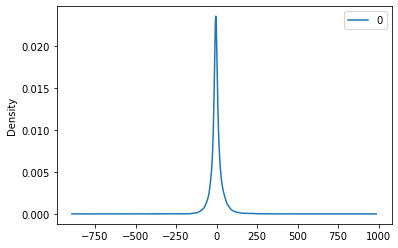

In [26]:
print(residuals.plot(kind='kde'))

In [27]:
residuals.describe() 

,0
count,18288.000000
mean,0.003298
std,40.682071
min,-422.896490
25%,-14.309612
50%,-3.974826
75%,10.382715
max,516.375745


In [28]:

from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [29]:
future_dataset = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [34]:
future_dataset.head(500)

,Count
2014-10-25 23:00:00,NaN
2014-11-25 23:00:00,NaN
2014-12-25 23:00:00,NaN
2015-01-25 23:00:00,NaN
2015-02-25 23:00:00,NaN
2015-03-25 23:00:00,NaN
2015-04-25 23:00:00,NaN
2015-05-25 23:00:00,NaN
2015-06-25 23:00:00,NaN
2015-07-25 23:00:00,NaN


In [35]:
future_df = pd.concat([df,future_dataset])

In [37]:
future_df['forecast'] = model_fit.predict(start=18289,end=18444, dynamic=True)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: could not broadcast input array from shape (0) into shape (1)